# **NAVIE** **BAYES**

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
data = pd.read_csv('/content/drive/MyDrive/pharmacy (1).csv')

In [27]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [29]:

categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['BP', 'Cholesterol', 'Drug', 'Sex']

In [30]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns


['Age', 'Na_to_K']

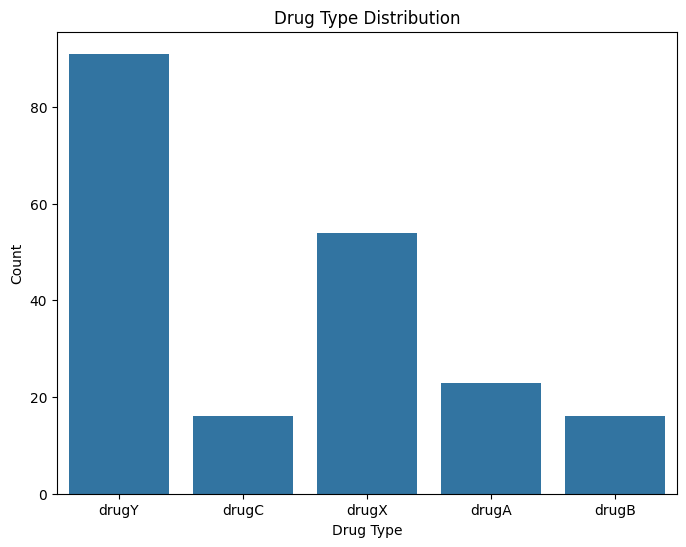

In [31]:
# Ploting the distribution of Drug Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Drug', data=data)
plt.title('Drug Type Distribution')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.show()# Convert categorical variables to dummy variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)


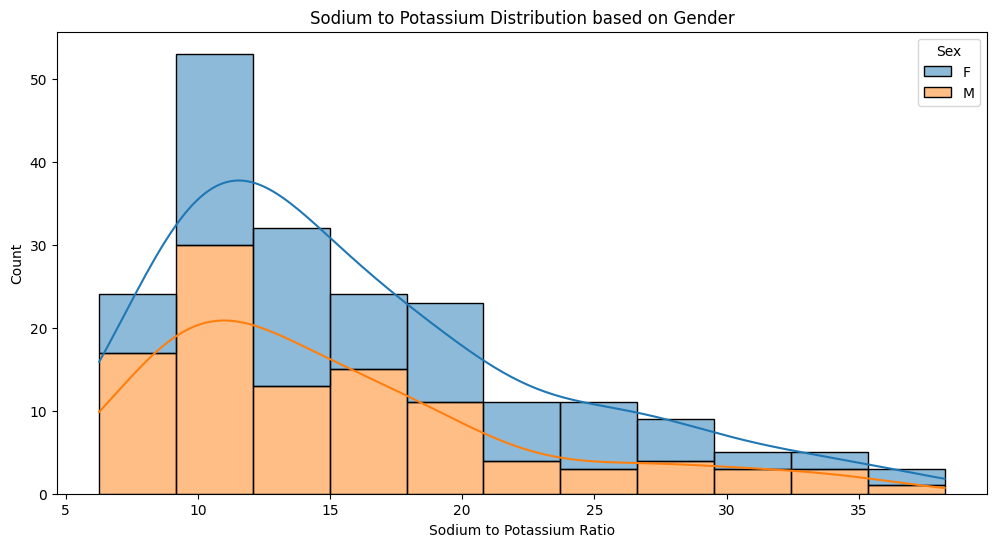

In [32]:
# Ploting the distribution of Sodium to Potassium based on Gender and Age
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Na_to_K', hue='Sex', multiple='stack', kde=True)
plt.title('Sodium to Potassium Distribution based on Gender')
plt.xlabel('Sodium to Potassium Ratio')
plt.ylabel('Count')
plt.show()


In [33]:
# Creating age bins
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['Below 20', '20-29', '30-39', '40-49', '50-59', '60-69', 'Above 70']
data['Age_bin'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

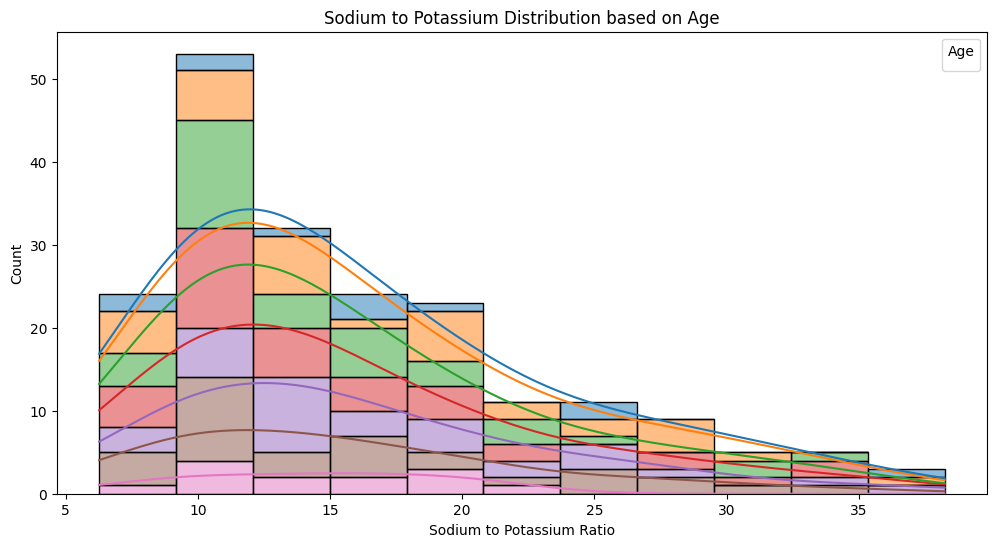

In [34]:
# Ploting the distribution of Sodium to Potassium based on Age
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Na_to_K', hue='Age_bin', multiple='stack', kde=True)
plt.title('Sodium to Potassium Distribution based on Age')
plt.xlabel('Sodium to Potassium Ratio')
plt.ylabel('Count')
plt.legend(title='Age')
plt.show()

In [35]:
bp_cholesterol_distribution = pd.crosstab(data['Cholesterol'], data['BP'])
print(bp_cholesterol_distribution)

BP           HIGH  LOW  NORMAL
Cholesterol                   
HIGH           35   31      37
NORMAL         42   33      22


In [36]:
# Binning Age into categories
data['Age_Category'] = pd.cut(data['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 100], labels=['Below 20', '20-29', '30-39', '40-49', '50-59', '60-69', 'Above 70'])

In [37]:
# Binning Na_to_K into categories
data['Na_to_K_Category'] = pd.cut(data['Na_to_K'], bins=[0, 10, 20, 30, float('inf')], labels=['Below 10', '10-20', '20-30', 'Above 30'])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report
# Encoding categorical variables
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data[['Sex', 'BP', 'Cholesterol', 'Age_Category', 'Na_to_K_Category']])
encoded_data = pd.DataFrame(encoded_data, columns=['Sex', 'BP', 'Cholesterol', 'Age_Category', 'Na_to_K_Category'])


X = encoded_data
y = data['Drug']

In [40]:

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB

# Naive Bayes Categorical
model_cat_nb = CategoricalNB()
model_cat_nb.fit(X_train, y_train)
y_pred_cat_nb = model_cat_nb.predict(X_test)

# Naive Bayes Gaussian
model_gauss_nb = GaussianNB()
model_gauss_nb.fit(X_train, y_train)
y_pred_gauss_nb = model_gauss_nb.predict(X_test)

print("Categorical Naive Bayes:")
print(confusion_matrix(y_test, y_pred_cat_nb))
print(classification_report(y_test, y_pred_cat_nb))

print("Gaussian Naive Bayes:")
print(confusion_matrix(y_test, y_pred_gauss_nb))
print(classification_report(y_test, y_pred_gauss_nb))


Categorical Naive Bayes:
[[ 3  0  0  0  4]
 [ 0  2  0  0  1]
 [ 0  0  2  1  3]
 [ 0  0  0 14  4]
 [ 0  1  1  4 20]]
              precision    recall  f1-score   support

       drugA       1.00      0.43      0.60         7
       drugB       0.67      0.67      0.67         3
       drugC       0.67      0.33      0.44         6
       drugX       0.74      0.78      0.76        18
       drugY       0.62      0.77      0.69        26

    accuracy                           0.68        60
   macro avg       0.74      0.60      0.63        60
weighted avg       0.71      0.68      0.67        60

Gaussian Naive Bayes:
[[ 6  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  8 10]
 [ 3  7  4  6  6]]
              precision    recall  f1-score   support

       drugA       0.67      0.86      0.75         7
       drugB       0.27      1.00      0.43         3
       drugC       0.60      1.00      0.75         6
       drugX       0.57      0.44      0.50        18
       drug

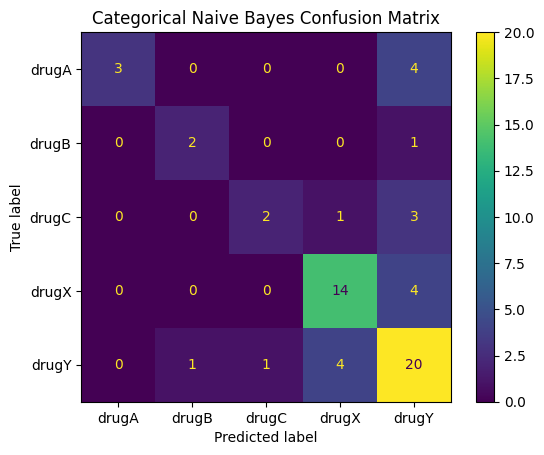

In [46]:
# Ploting confusion matrix for Categorical Naive Bayes
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cat_nb, display_labels=model_cat_nb.classes_)
plt.title('Categorical Naive Bayes Confusion Matrix')
plt.show()


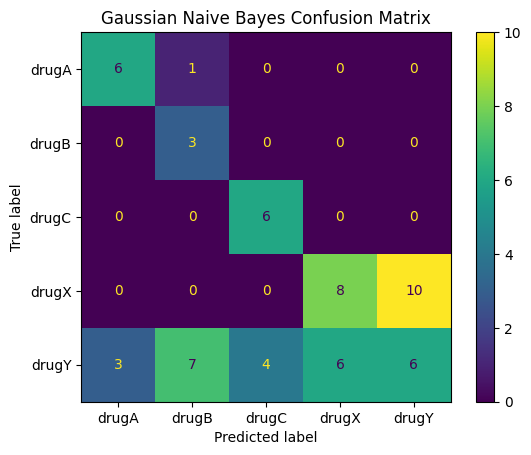

In [47]:
# Ploing confusion matrix for Gaussian Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gauss_nb, display_labels=model_gauss_nb.classes_)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

bold text
# DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree:
[[ 5  0  0  0  2]
 [ 0  3  0  0  0]
 [ 0  0  4  0  2]
 [ 0  0  0 17  1]
 [ 0  3  2  4 17]]
              precision    recall  f1-score   support

       drugA       1.00      0.71      0.83         7
       drugB       0.50      1.00      0.67         3
       drugC       0.67      0.67      0.67         6
       drugX       0.81      0.94      0.87        18
       drugY       0.77      0.65      0.71        26

    accuracy                           0.77        60
   macro avg       0.75      0.80      0.75        60
weighted avg       0.79      0.77      0.77        60



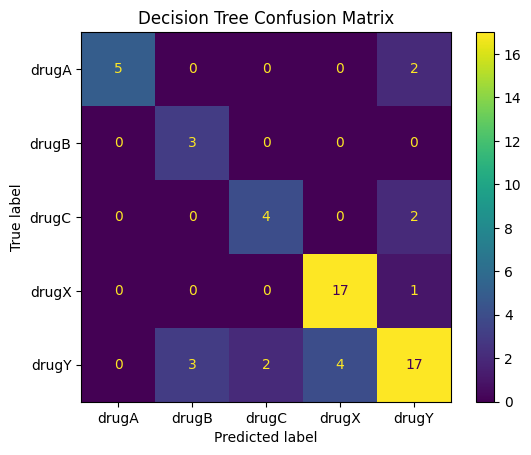

In [48]:
# Ploting confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=model_dt.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.show()